<a href="https://colab.research.google.com/github/khatriprajwol/Data-Visualization-/blob/main/01_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Jupyter Notebooks and Python

## Jupyter Notebooks and Markdown

Jupyter notebooks have two important enviroments!  

1. Text boxes
2. Coding boxes

In [ ]:
#this is a coding box

print('Hello World')

Hello World


The text boxes support the markdown language.  Think of it like html but a lot easier!  You can create [links](https://github.com/nurfnick/Data_Viz), make lists, tables, include images, and you'll probably teach me a trick in it too!  Here is a great reference https://www.markdownguide.org/cheat-sheet/ 

I'll do some math typesetting too.  markdown supports $\LaTeX$ encodings too with $ or $$

$$
x
=
\frac
{
  -b\pm\sqrt{b^2-4ac}
}
{2a}
$$

Try it, I think you'll mind markdown a great way to express yourself on the web!

## Jupyter Notebooks and Python

Code boxes support python coding.  I'll always use python 3, 2 is legacy now and I don't see people using it very much anymore.  

Notebooks allow for the code to be run out of order so be careful about reporducibility in your code.  You can move blocks in a notebook up and down over on the right!  Shift + Enter executes a cell (even text!)

### Style For Python

I'll load my packages in their own code cell.  Most things I do will be in their own code cell.  Notebook environment allows you to test your code quickly, especially when writing small functions.

In [ ]:
import numpy as np #a matrix like package for handling data
import pandas as pd #a R like package for handling data
from scipy import stats #a way to just get a piece of a large package
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def f(x):
  return x**2

f(-2)

4

I'll encourage you to intersperse your code with comments about it using the text box!  Here I have defined a function that is $f(x) = x^2$.  What would have happened if I had done x^2?

In [ ]:
-2^2

-4

That's not right!  Anybody know why?

Let's get a visualization since that is why we are here!

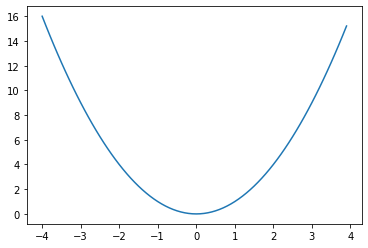

In [ ]:
x = np.arange(-4,4,.1)
y = f(x)

plt.plot(x,y)

I'll get a statistics visualization in here too!

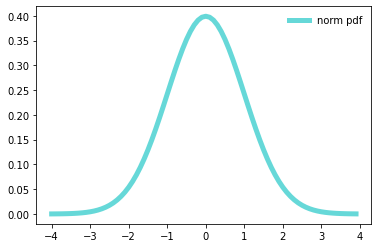

In [ ]:
x = np.arange(-4,4,.1)

plt.plot(x,stats.norm.pdf(x),'c', lw=5, alpha=0.6, label='norm pdf',) #matplotlib has tons of options!
plt.legend(loc='best', frameon=False)
plt.show()

Of course this is not really a data visualization!  

### Data and Visualization

To load data, I am going to pull a csv from the web.  There are tons of places you can find data but this is by far my preferred method!

In [ ]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',header = None)

df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


There were no column names (header) on the website data file.  Instead, I'll grab those next and add them to the file.

In [ ]:
head = ['Class','Alcohol','MalicAcid','Ash','AlcalinityAsh','Magnesium','Phenols','Flavanoids','NonflavanoidPhenols','Proanthocyanins','ColorIntensity','Hue','OD280/OD315','Proline'] 
#https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.names more info on the data file than you could ever use!
df.columns = head
df.head() # only prints the first 5

,Class,Alcohol,MalicAcid,Ash,AlcalinityAsh,Magnesium,Phenols,Flavanoids,NonflavanoidPhenols,Proanthocyanins,ColorIntensity,Hue,OD280/OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Let's build all the intro to stats vizualizations we can!  Class is the only categorical variable so 

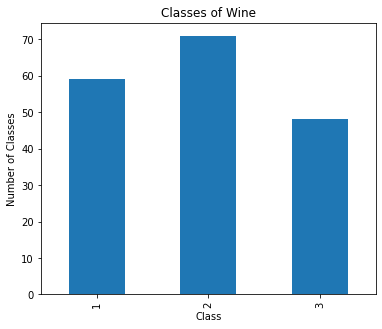

In [ ]:
dfg = df.groupby(['Class'])['Class'].count()

dfg.plot(kind='bar', title='Classes of Wine', ylabel='Number of Classes',
         xlabel='Class', figsize=(6, 5))

I am not going to lie, this was much harder than I thought it would be!  Let me explain what I had to do.  Basically I want to count how many times 'Class' == 1 occurs.  To do that, I created a new dataframe and grouped the classes together and asked it to count how many 'Class's there are.  Not the sexiest process...

What are some things that could be fixed in the above graphic?

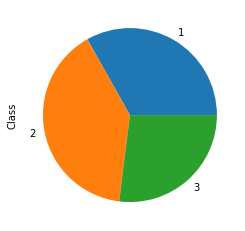

In [ ]:
dfg.plot(kind= 'pie')

I think this is the only pie chart you will see this semester!

Next I'll do some quantitaive variables.

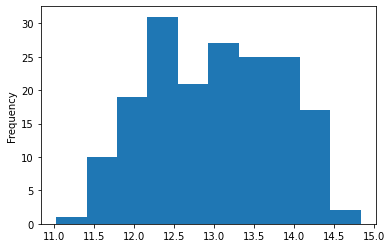

In [ ]:
df.Alcohol.plot(kind = 'hist')

Here I call just the dataframe, the column I want and then ask it to plot.  I think this is very slick!  Next is a box plot we should know and love!

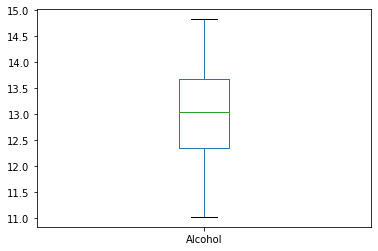

In [ ]:
df.Alcohol.plot(kind = 'box')

Lastly, I just looked at [all the options](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html) until I saw one I thought might work...

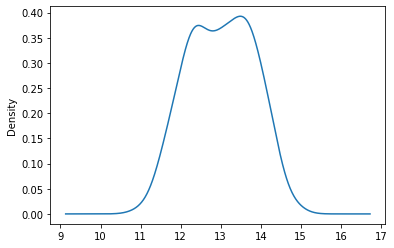

In [ ]:
df.Alcohol.plot(kind = 'kde')

With each of these graphics, we should also be worried about the summary statistics that are represented

Graphic|Statistic
-------|---------
Histogram|Mean and Standard Deviation
Box Plot|Five Number Summary

In [ ]:
df.Alcohol.mean()

13.000617977528083

In [ ]:
df.Alcohol.std()

0.8118265380058577

In [ ]:
df.Alcohol.describe()[3:]#I'm cheating here, this also did the mean and standard deviation...

min    11.0300
25%    12.3625
50%    13.0500
75%    13.6775
max    14.8300
Name: Alcohol, dtype: float64

In [ ]:
df.Alcohol.quantile(q = .75)

13.6775

In [ ]:
df.Alcohol.min()

11.03

Let's get a little more exotic and do a side-by-side of some data.

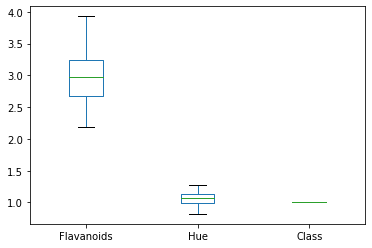

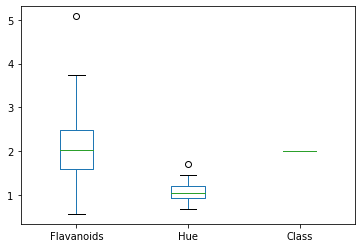

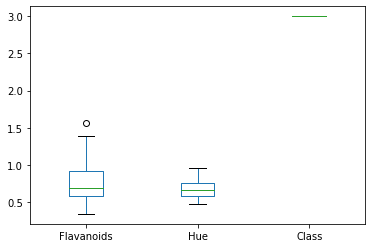

In [ ]:
dfg = df.groupby('Class')[['Flavanoids','Hue','Class']]
dfg.plot(kind = 'box')
plt.show()

I could not get these to be side-by-side, time to pull out the big guns!  Seaborn is another package that was really built for visualizing data.

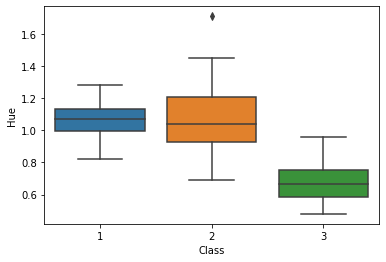

In [ ]:
sns.boxplot(y='Hue', x = 'Class', data = df)
#sns.boxplot(y='Flavanoids', x = 'Class', data = df)

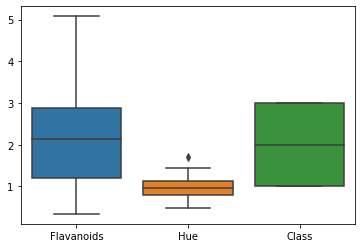

In [ ]:
sns.boxplot(data = df[['Flavanoids','Hue','Class']])

I really wanted the side-by-side to have multiple data inputs.  I am embarassed how long this took me but I blame my spelling of 'colmuns'

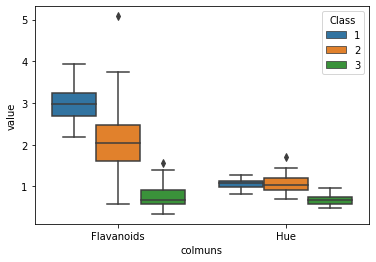

In [ ]:
df_melt = df.melt(id_vars = 'Class',
                  value_vars = ['Flavanoids','Hue'],
                  var_name = 'colmuns')

sns.boxplot(x = 'colmuns',y='value',hue = 'Class',data = df_melt)

The melt command is very powerful and does some nifty things to large datasets quickly!

In [ ]:
df_melt

,Class,colmuns,value
0,1,Flavanoids,3.06
1,1,Flavanoids,2.76
2,1,Flavanoids,3.24
3,1,Flavanoids,3.49
4,1,Flavanoids,2.69
...,...,...,...
351,3,Hue,0.64
352,3,Hue,0.70
353,3,Hue,0.59
354,3,Hue,0.60


Last thing on my list is also not available on `pandas` so I am doing it in `seaborn`, the Violin plot.

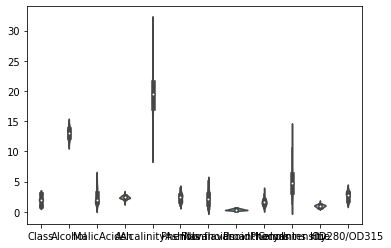

In [ ]:
sns.violinplot(data = df.drop(['Proline','Magnesium'],1))

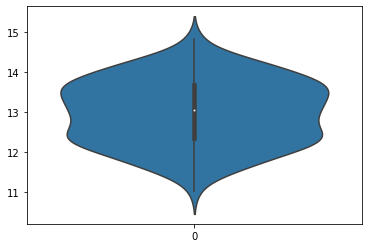

In [ ]:
sns.violinplot(data = df.Alcohol)

I couldn't really see the shape above so I just included one dataset.  I think these are really niffty!  The violin plot shows more than the box plot and the histogram.

## Your Turn

1. Create a new Jupyter notebook.  Title and put your name on your document
2. Load Libraries
3. Gather the iris dataset and load it into your notebook.  https://raw.githubusercontent.com/nurfnick/Data_Viz/main/iris.csv
4. Examine the dataset.
5. Create a boxplot of the categorical variable
5. Create visualizations of your favorite variable
  1. Histogram
  2. Box Plot
  3. Violin
7. Compute statistics accompanying the visualizations created
8. Save your notebook to GitHub and share the link in the blackboard assignment